# Libraries

In [9]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Data Preparation

In [7]:
# load dataset
df_purchase = pd.read_csv('Desktop/Customer Analytics in python/purchase data.csv')

# import Scaler
scaler = pickle.load(open('scaler.pickle', 'rb'))

# import PCA
pca = pickle.load(open('pca.pickle', 'rb'))

# import K means
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

# standardization
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

# apply pca
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

# segment data
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

# create a copy of the data frame
df_purchase_predictors = df_purchase.copy()

# add segment labels
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment' , prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

# Purchase Probability Model

In [8]:
Y = df_pa['Incidence']

In [10]:
X = pd.DataFrame()
X['Mean Price'] = (df_pa['Price_1'] +
                  df_pa['Price_2'] +
                  df_pa['Price_3'] +
                  df_pa['Price_4'] +
                  df_pa['Price_5']) / 5

In [12]:
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
model_purchase.coef_

array([[-2.34762128]])

# Price Elasticity of Purchase Probability

In [14]:
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [16]:
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [18]:
df_price_range = pd.DataFrame(price_range)

In [22]:
Y_pr = model_purchase.predict_proba(df_price_range)

In [23]:
Y_pr

array([[0.08214314, 0.91785686],
       [0.08393059, 0.91606941],
       [0.08575331, 0.91424669],
       [0.08761183, 0.91238817],
       [0.08950668, 0.91049332],
       [0.09143841, 0.90856159],
       [0.09340755, 0.90659245],
       [0.09541464, 0.90458536],
       [0.09746022, 0.90253978],
       [0.09954483, 0.90045517],
       [0.10166901, 0.89833099],
       [0.10383329, 0.89616671],
       [0.1060382 , 0.8939618 ],
       [0.10828428, 0.89171572],
       [0.11057205, 0.88942795],
       [0.11290203, 0.88709797],
       [0.11527475, 0.88472525],
       [0.11769071, 0.88230929],
       [0.12015044, 0.87984956],
       [0.12265442, 0.87734558],
       [0.12520317, 0.87479683],
       [0.12779716, 0.87220284],
       [0.13043688, 0.86956312],
       [0.13312281, 0.86687719],
       [0.1358554 , 0.8641446 ],
       [0.13863511, 0.86136489],
       [0.14146239, 0.85853761],
       [0.14433766, 0.85566234],
       [0.14726135, 0.85273865],
       [0.15023387, 0.84976613],
       [0.

In [24]:
purchase_pr = Y_pr[:, 1]

In [25]:
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

In [26]:
df_price_elasticities = pd.DataFrame(price_range)

In [27]:
df_price_elasticities = df_price_elasticities.rename(columns = {0:'Price_Point'})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096420
1,0.51,-0.100489
2,0.52,-0.104684
3,0.53,-0.109010
4,0.54,-0.113469
...,...,...
295,3.45,-8.011349
296,3.46,-8.036595
297,3.47,-8.061806
298,3.48,-8.086984


In [29]:
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096420
1,0.51,-0.100489
2,0.52,-0.104684
3,0.53,-0.109010
4,0.54,-0.113469
5,0.55,-0.118065
6,0.56,-0.122800
7,0.57,-0.127679
8,0.58,-0.132704
9,0.59,-0.137879


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

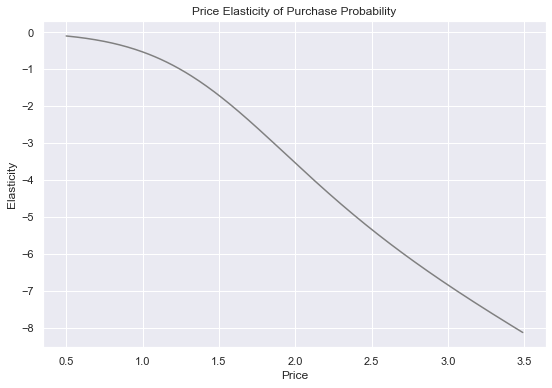

In [30]:
plt.figure(figsize = (9,6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')